In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Operational_Cost_Forecasting_Dataset.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record_ID                  10000 non-null  object 
 1   Department                 10000 non-null  object 
 2   Region                     10000 non-null  object 
 3   Month                      10000 non-null  object 
 4   Operational_Hours          10000 non-null  float64
 5   Downtime_Hours             10000 non-null  float64
 6   Maintenance_Cost_USD       10000 non-null  float64
 7   Labor_Cost_USD             10000 non-null  float64
 8   Material_Cost_USD          10000 non-null  float64
 9   Energy_Cost_USD            10000 non-null  float64
 10  Forecasted_Total_Cost_USD  10000 non-null  float64
dtypes: float64(7), object(4)
memory usage: 859.5+ KB


In [10]:
df.describe()

,Operational_Hours,Downtime_Hours,Maintenance_Cost_USD,Labor_Cost_USD,Material_Cost_USD,Energy_Cost_USD,Forecasted_Total_Cost_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,160.062180,4.986570,12045.276840,4997.987835,2990.417984,1995.496418,22048.994342
std,9.937845,1.972043,3021.117663,1501.751480,996.821089,694.631030,4286.270301
min,115.200000,0.000000,1000.000000,500.000000,300.000000,200.000000,6981.658266
25%,153.300000,3.700000,10032.195000,3994.442500,2318.120000,1519.750000,19103.243894
50%,160.100000,5.000000,12035.170000,4995.355000,2973.545000,1990.835000,21965.829237
75%,166.900000,6.300000,14064.542500,6025.817500,3662.845000,2457.270000,24804.131598
max,201.500000,13.200000,23328.730000,10212.860000,6659.030000,4702.060000,40867.424445


In [11]:
df.head()

,Record_ID,Department,Region,Month,Operational_Hours,Downtime_Hours,Maintenance_Cost_USD,Labor_Cost_USD,Material_Cost_USD,Energy_Cost_USD,Forecasted_Total_Cost_USD
0,REC000001,Paint,Fremont,2024-04,168.1,9.0,10440.69,1862.21,1404.45,3049.35,16194.556067
1,REC000002,Assembly,Shanghai,2023-02,164.1,5.9,15186.19,2066.89,1752.83,1910.22,23180.745457
2,REC000003,Body,Austin,2023-04,133.4,1.3,14066.41,2821.88,2925.21,2011.01,18938.985278
3,REC000004,Assembly,Shanghai,2024-09,152.2,3.7,15458.56,3192.20,5275.72,2774.97,30897.544472
4,REC000005,Assembly,Shanghai,2024-06,164.7,6.6,9826.71,6500.50,4698.55,1975.35,25090.059502


In [12]:
df.shape

(10000, 11)

#### Parse the 'Date' column as datetime

In [14]:
df['Month'] = pd.to_datetime(df['Month'])

## KPI 1: Downtime Ratio

In [16]:
df['Downtime_Ratio'] = df['Downtime_Hours'] / df['Operational_Hours']

## KPI 2: Maintenance Cost per Operational Hour

In [17]:
df['Maintenance_Cost_per_Hour'] = df['Maintenance_Cost_USD'] / df['Operational_Hours']


## KPI 3: Labor Cost % 

In [18]:
df['Labor_Cost_Percentage'] = df['Labor_Cost_USD'] / df['Forecasted_Total_Cost_USD']

## # KPI 4: Material Cost % 

In [19]:
df['Material_Cost_Percentage'] = df['Material_Cost_USD'] / df['Forecasted_Total_Cost_USD']


## KPI 5: Energy Cost %

In [20]:
df['Energy_Cost_Percentage'] = df['Energy_Cost_USD'] / df['Forecasted_Total_Cost_USD']


## KPI 6: Forecasted Cost Trend Over Time


In [21]:
forecasted_cost_trend = df.groupby('Month')['Forecasted_Total_Cost_USD'].sum().reset_index()


# Visualization: Line chart for Forecasted Cost Trend


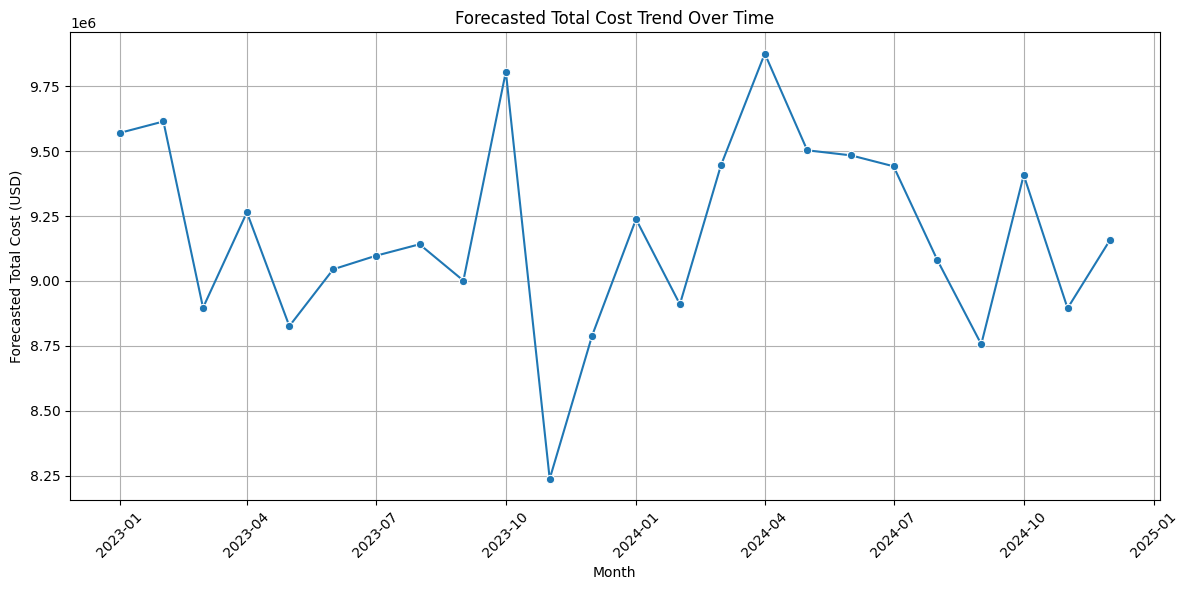

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=forecasted_cost_trend, x='Month', y='Forecasted_Total_Cost_USD', marker='o')
plt.title('Forecasted Total Cost Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Forecasted Total Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



### Display first few rows with new KPIs

In [26]:
from IPython.display import display
display(df.head(10))


,Record_ID,Department,Region,Month,Operational_Hours,Downtime_Hours,Maintenance_Cost_USD,Labor_Cost_USD,Material_Cost_USD,Energy_Cost_USD,Forecasted_Total_Cost_USD,Downtime_Ratio,Maintenance_Cost_per_Hour,Labor_Cost_Percentage,Material_Cost_Percentage,Energy_Cost_Percentage
0,REC000001,Paint,Fremont,2024-04-01,168.1,9.0,10440.69,1862.21,1404.45,3049.35,16194.556067,0.053540,62.109994,0.114990,0.086724,0.188295
1,REC000002,Assembly,Shanghai,2023-02-01,164.1,5.9,15186.19,2066.89,1752.83,1910.22,23180.745457,0.035954,92.542291,0.089164,0.075616,0.082405
2,REC000003,Body,Austin,2023-04-01,133.4,1.3,14066.41,2821.88,2925.21,2011.01,18938.985278,0.009745,105.445352,0.148998,0.154454,0.106184
3,REC000004,Assembly,Shanghai,2024-09-01,152.2,3.7,15458.56,3192.20,5275.72,2774.97,30897.544472,0.024310,101.567411,0.103316,0.170749,0.089812
4,REC000005,Assembly,Shanghai,2024-06-01,164.7,6.6,9826.71,6500.50,4698.55,1975.35,25090.059502,0.040073,59.664299,0.259087,0.187267,0.078730
5,REC000006,Chassis,Austin,2024-05-01,177.1,4.7,10843.09,4596.17,2399.59,1719.04,16188.275335,0.026539,61.225805,0.283920,0.148230,0.106190
6,REC000007,Body,Berlin,2023-10-01,159.9,4.0,13582.38,8046.83,1597.49,1819.71,26835.777290,0.025016,84.942964,0.299855,0.059528,0.067809
7,REC000008,Body,Austin,2024-09-01,161.0,3.7,15394.45,4438.97,2558.91,1877.18,22137.719078,0.022981,95.617702,0.200516,0.115590,0.084796
8,REC000009,Body,Berlin,2023-09-01,158.9,3.2,12665.51,4560.38,2829.51,1239.39,18711.604110,0.020138,79.707426,0.243719,0.151217,0.066236
9,REC000010,Assembly,Austin,2024-03-01,146.9,5.5,6304.10,6989.26,3095.40,868.63,20250.308171,0.037440,42.914227,0.345143,0.152857,0.042895


# Visualizations

## Downtime Rate

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_27381/2713969801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Downtime_Ratio', palette='coolwarm')


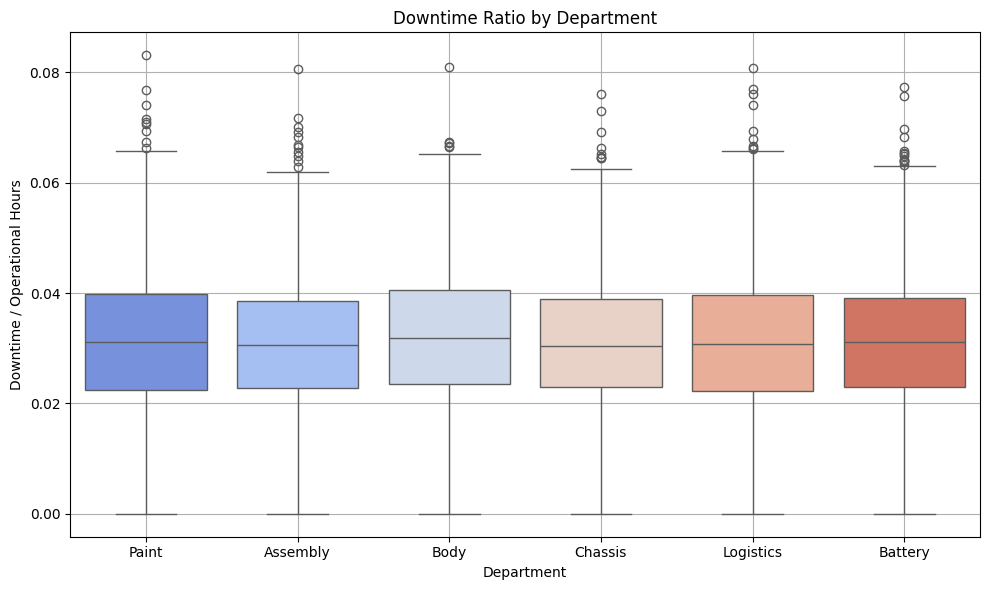

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Downtime_Ratio', palette='coolwarm')
plt.title('Downtime Ratio by Department')
plt.ylabel('Downtime / Operational Hours')
plt.xlabel('Department')
plt.grid(True)
plt.tight_layout()
plt.show()


## Maintenance Cost per Operational Hour

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_27381/3578016189.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Maintenance_Cost_per_Hour', estimator=np.mean, ci=None, palette='viridis')
/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_27381/3578016189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Maintenance_Cost_per_Hour', estimator=np.mean, ci=None, palette='viridis')


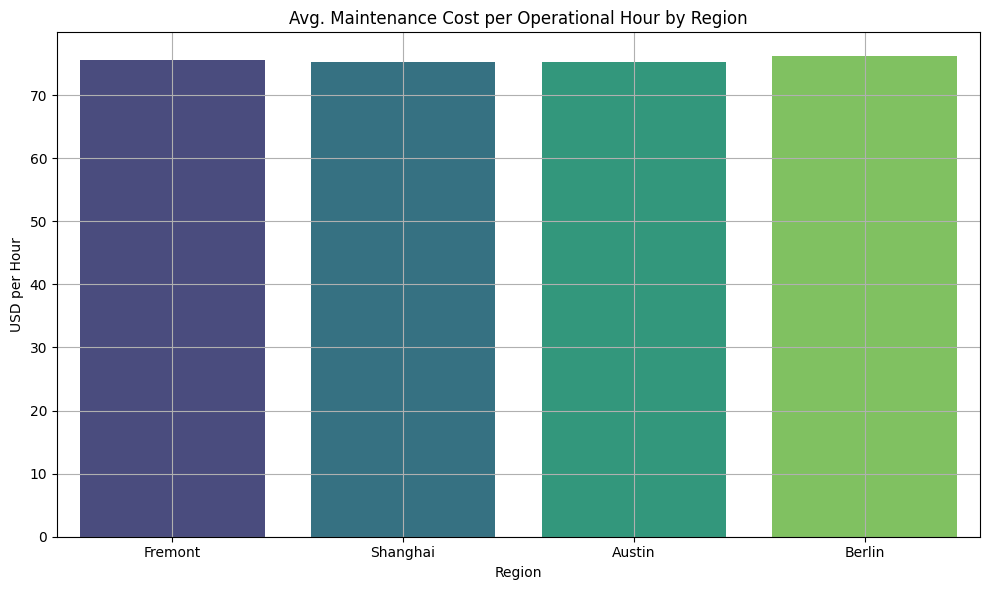

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Maintenance_Cost_per_Hour', estimator=np.mean, ci=None, palette='viridis')
plt.title('Avg. Maintenance Cost per Operational Hour by Region')
plt.ylabel('USD per Hour')
plt.xlabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()


## Labor Cost % of Forecasted Total

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_27381/3275143962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Labor_Cost_Percentage', palette='Blues')


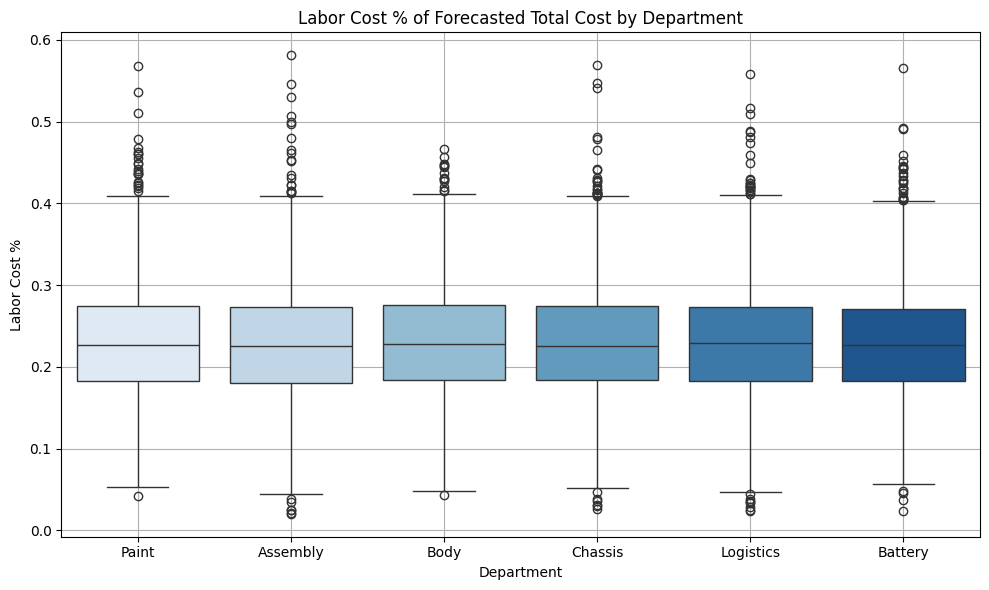

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Labor_Cost_Percentage', palette='Blues')
plt.title('Labor Cost % of Forecasted Total Cost by Department')
plt.ylabel('Labor Cost %')
plt.xlabel('Department')
plt.grid(True)
plt.tight_layout()
plt.show()


## Material Cost % of Forecasted Total

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_27381/2006057027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Material_Cost_Percentage', palette='Greens')


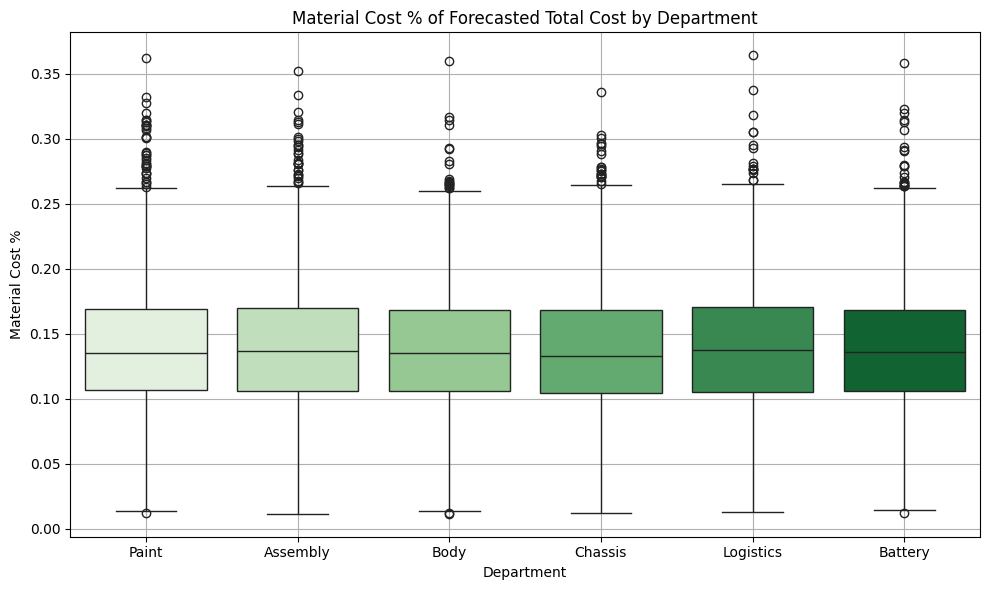

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Material_Cost_Percentage', palette='Greens')
plt.title('Material Cost % of Forecasted Total Cost by Department')
plt.ylabel('Material Cost %')
plt.xlabel('Department')
plt.grid(True)
plt.tight_layout()
plt.show()


## Energy Cost % of Forecasted Total

/var/folders/n5/c4crmm5x5jg679nymtmcb9dh0000gn/T/ipykernel_27381/584491816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Energy_Cost_Percentage', palette='Oranges')


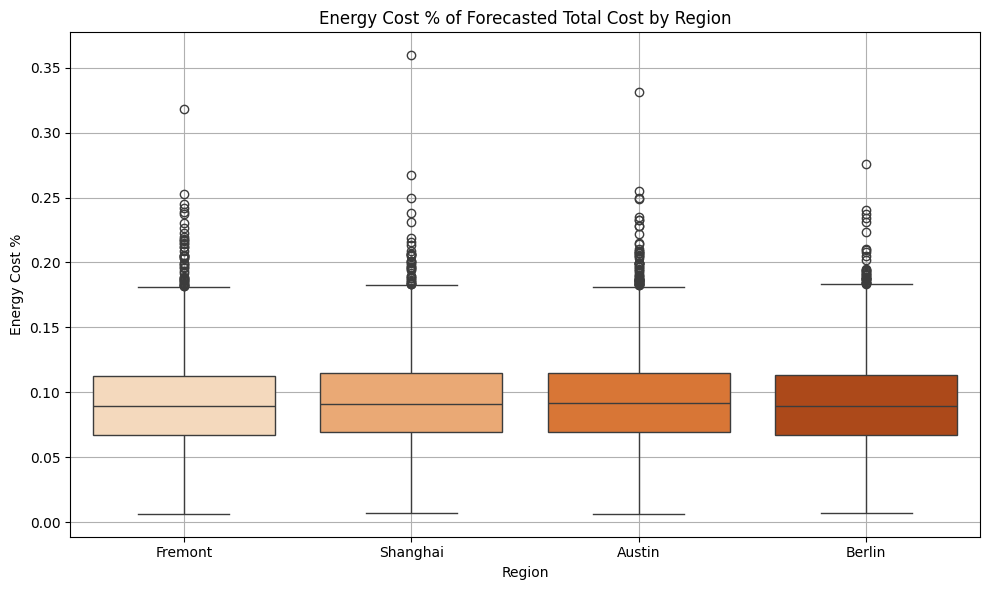

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Energy_Cost_Percentage', palette='Oranges')
plt.title('Energy Cost % of Forecasted Total Cost by Region')
plt.ylabel('Energy Cost %')
plt.xlabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()


## Trend by Department

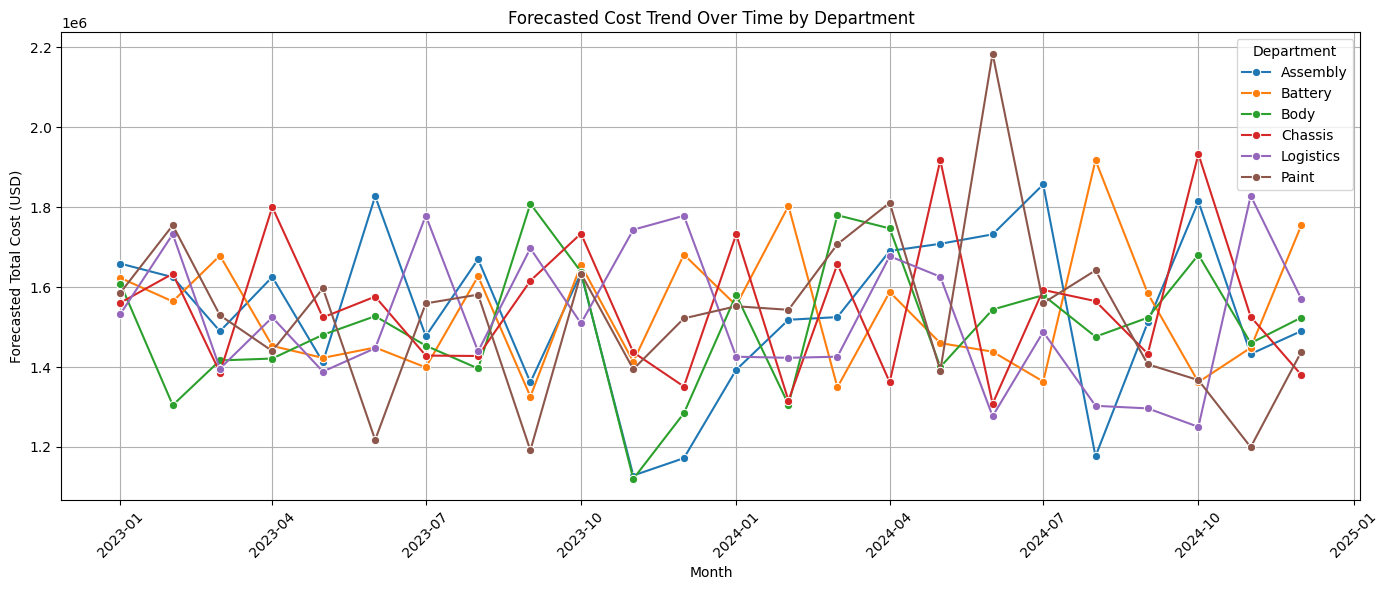

In [40]:
trend_by_dept = df.groupby(['Month', 'Department'])['Forecasted_Total_Cost_USD'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_by_dept, x='Month', y='Forecasted_Total_Cost_USD', hue='Department', marker='o')
plt.title('Forecasted Cost Trend Over Time by Department')
plt.xlabel('Month')
plt.ylabel('Forecasted Total Cost (USD)')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.grid(True)
plt.tight_layout()
plt.show()
